<center><font color="#e30b5d"><h1>Question 4</h1></font></center>

In [2]:
import  pandas                  as pd
import  numpy                   as np
import  matplotlib.pyplot       as plt
import  seaborn                 as sns

from    sklearn.svm             import SVC
from    sklearn.svm             import SVR
from    sklearn.datasets        import load_iris
from    sklearn.model_selection import train_test_split
from    sklearn.model_selection import GridSearchCV
from    sklearn.metrics         import accuracy_score
from    sklearn.metrics         import confusion_matrix
from    sklearn.metrics         import classification_report
from    sklearn.metrics         import ConfusionMatrixDisplay
from    sklearn.preprocessing   import StandardScaler
from    matplotlib.colors       import ListedColormap
from    matplotlib.pyplot       import pcolormesh

<center><font color="#00FF00"><h2>Part A</h2></font></center>

In [3]:
iris            = load_iris()
data            = iris.data
target          = iris.target
feature_name    = iris.feature_names

In [6]:
df              = pd.DataFrame(data=data, columns=feature_name)
df['Target']    = target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
X = df.iloc[:, :-1]
y = df.iloc[:,  -1]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



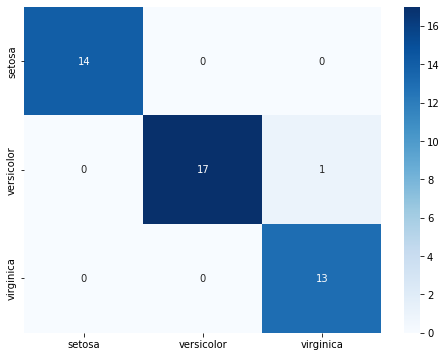

In [9]:
feature_1 = 1
feature_2 = 2

plt.figure(figsize = (8, 6))

clf             = SVC(kernel = 'linear')
clf.fit(Xtrain.iloc[:, [feature_1, feature_2]], Ytrain)
ypred = clf.predict(Xtest.iloc[:, [1, 2]])
cr  = classification_report(y_pred = ypred, y_true=Ytest)
print(cr)
class_names  = iris.target_names
cnf_matrix   = confusion_matrix(y_true=Ytest, y_pred=ypred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g',
            xticklabels=class_names , yticklabels=class_names,
            cmap=plt.cm.Blues)
plt.show()

In [10]:
%%capture

a = Xtest.iloc[:, feature_1].min() - 0.5
b = Xtest.iloc[:, feature_1].max() + 0.5

x = np.linspace(a, b, 1000)

c = Xtest.iloc[:, feature_2].min() - 0.5
d = Xtest.iloc[:, feature_2].max() + 0.5

y = np.linspace(c, d, 1000)

xx, yy = np.meshgrid(x, y)

z = np.c_[xx.reshape(-1, 1), yy.reshape(-1, 1)]

zz = clf.predict(z).reshape(xx.shape)

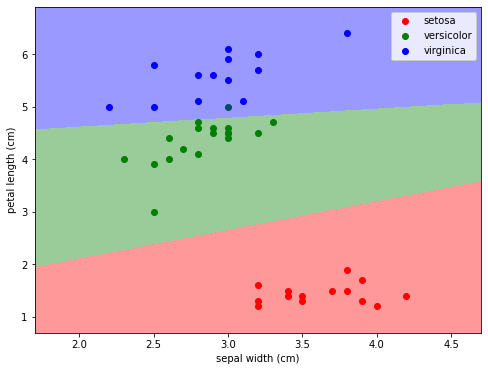

In [11]:
plt.figure(figsize = (8, 6))

for i, c in zip(sorted(Ytest.unique()), list('rgb')):
    plt.scatter(x = Xtest.loc[Ytest == i, feature_name[feature_1]], y = Xtest.loc[Ytest == i, feature_name[feature_2]], c = c, label = iris.target_names[i])

plt.pcolormesh(xx, yy, zz, cmap = ListedColormap(list('rgb')), alpha=0.4)

plt.xlabel(feature_name[1])
plt.ylabel(feature_name[2])
plt.legend()
plt.show()

<center><font color="#00FF00"><h2>Part B</h2></font></center>

In [12]:
X = df.iloc[:, :-1]
y = df.iloc[:,  -1]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=1)

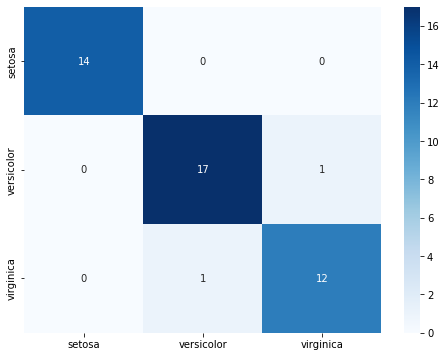

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [13]:
feature_1 = 2
feature_2 = 3

plt.figure(figsize = (8, 6))

clf         = SVC(kernel = 'linear')
clf.fit(Xtrain.iloc[:, [feature_1, feature_2]], Ytrain)

ypred       = clf.predict(Xtest.iloc[:, [feature_1, feature_2]])

cr          = classification_report(y_pred = ypred, y_true=Ytest)

cnf_matrix  = confusion_matrix(y_true=Ytest, y_pred=ypred)
cnf_matrix  = confusion_matrix(y_true=Ytest, y_pred=ypred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g',
            xticklabels=class_names , yticklabels=class_names,
            cmap=plt.cm.Blues)
plt.show()
print(cr)

In [14]:
%%capture
a = Xtest.iloc[:, feature_1].min() - 0.5
b = Xtest.iloc[:, feature_1].max() + 0.5

x = np.linspace(a, b, 1000)

c = Xtest.iloc[:, feature_2].min() - 0.5
d = Xtest.iloc[:, feature_2].max() + 0.5

y = np.linspace(c, d, 1000)

xx, yy = np.meshgrid(x, y)

z = np.c_[xx.reshape(-1, 1), yy.reshape(-1, 1)]

zz = clf.predict(z).reshape(xx.shape)

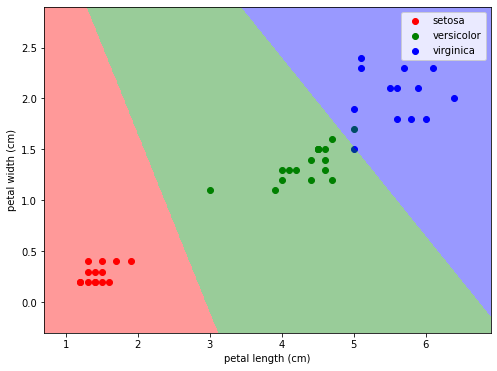

In [15]:
plt.figure(figsize = (8, 6))

for i, c in zip(sorted(Ytest.unique()), list('rgb')):
    plt.scatter(x = Xtest.loc[Ytest == i].iloc[:, feature_1], y = Xtest.loc[Ytest == i].iloc[:, feature_2], c = c, label = iris.target_names[i])

plt.pcolormesh(xx, yy, zz, cmap = ListedColormap(list('rgb')), alpha=0.4)
plt.xlabel(feature_name[feature_1])
plt.ylabel(feature_name[feature_2])
plt.legend([iris.target_names[0], iris.target_names[1], iris.target_names[2]])
plt.show()

<center><font color="#00FF00"><h2>Part C</h2></font></center>

<center><font color="#FFFF00"><h3>Linear</h3></font></center>

In [16]:
X = df.iloc[:, :-1]
y = df.iloc[:,  -1]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=1)

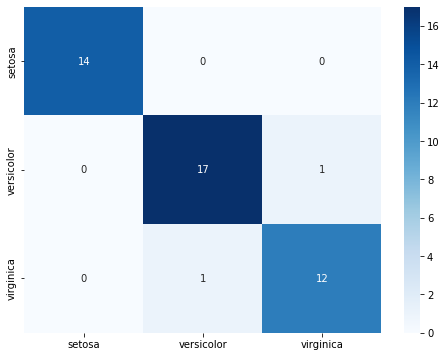

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [17]:
feature_1 = 2
feature_2 = 3

plt.figure(figsize = (8, 6))

clf_linear  = SVC(kernel = 'linear')
clf_linear.fit(Xtrain.iloc[:, [feature_1, feature_2]], Ytrain)

ypred       = clf_linear.predict(Xtest.iloc[:, [feature_1, feature_2]])

cr          = classification_report(y_pred = ypred, y_true=Ytest)

cnf_matrix  = confusion_matrix(y_true=Ytest, y_pred=ypred)
cnf_matrix  = confusion_matrix(y_true=Ytest, y_pred=ypred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g',
            xticklabels=class_names , yticklabels=class_names,
            cmap=plt.cm.Blues)
plt.show()
print(cr)

In [18]:
%%capture
a = Xtest.iloc[:, feature_1].min() - 0.5
b = Xtest.iloc[:, feature_1].max() + 0.5

x = np.linspace(a, b, 1000)

c = Xtest.iloc[:, feature_2].min() - 0.5
d = Xtest.iloc[:, feature_2].max() + 0.5

y = np.linspace(c, d, 1000)

xx, yy = np.meshgrid(x, y)

z = np.c_[xx.reshape(-1, 1), yy.reshape(-1, 1)]

zz = clf_linear.predict(z).reshape(xx.shape)

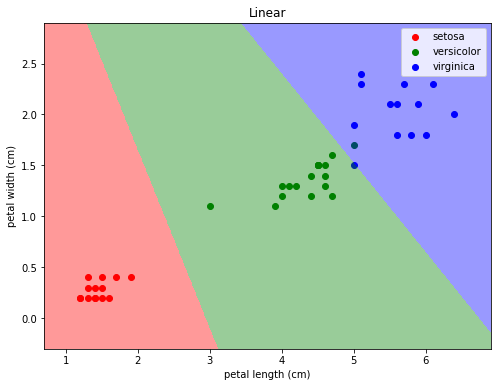

In [19]:
plt.figure(figsize = (8, 6))

for i, c in zip(sorted(Ytest.unique()), list('rgb')):
    plt.scatter(x = Xtest.loc[Ytest == i].iloc[:, feature_1], y = Xtest.loc[Ytest == i].iloc[:, feature_2], c = c, label = iris.target_names[i])

plt.pcolormesh(xx, yy, zz, cmap = ListedColormap(list('rgb')), alpha=0.4)
plt.xlabel(feature_name[feature_1])
plt.ylabel(feature_name[feature_2])
plt.legend([iris.target_names[0], iris.target_names[1], iris.target_names[2]])
plt.title('Linear')
plt.show()

<center><font color="#FFFF00"><h3>RBF</h3></font></center>

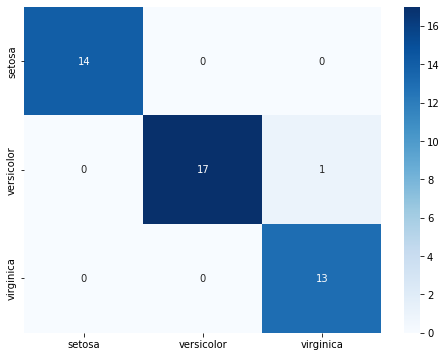

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [20]:
X           = df.iloc[:, :-1]
y           = df.iloc[:,  -1]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=1)

feature_1   = 2
feature_2   = 3

plt.figure(figsize = (8, 6))

clf_rbf     = SVC(kernel = 'rbf')
clf_rbf.fit(Xtrain.iloc[:, [feature_1, feature_2]], Ytrain)

ypred       = clf_rbf.predict(Xtest.iloc[:, [feature_1, feature_2]])
cr          = classification_report(y_pred = ypred, y_true=Ytest)
cnf_matrix  = confusion_matrix(y_true=Ytest, y_pred=ypred)
cnf_matrix  = confusion_matrix(y_true=Ytest, y_pred=ypred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g',
            xticklabels=class_names , yticklabels=class_names,
            cmap=plt.cm.Blues)
plt.show()
print(cr)

In [21]:
%%capture
a = Xtest.iloc[:, feature_1].min() - 0.5
b = Xtest.iloc[:, feature_1].max() + 0.5

x = np.linspace(a, b, 1000)

c = Xtest.iloc[:, feature_2].min() - 0.5
d = Xtest.iloc[:, feature_2].max() + 0.5

y = np.linspace(c, d, 1000)

xx, yy = np.meshgrid(x, y)

z = np.c_[xx.reshape(-1, 1), yy.reshape(-1, 1)]

zz = clf_rbf.predict(z).reshape(xx.shape)

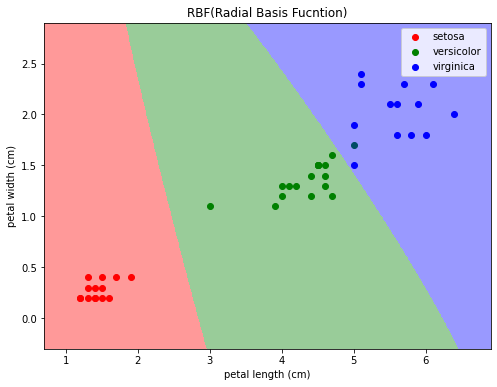

In [22]:
plt.figure(figsize = (8, 6))

for i, c in zip(sorted(Ytest.unique()), list('rgb')):
    plt.scatter(x = Xtest.loc[Ytest == i].iloc[:, feature_1], y = Xtest.loc[Ytest == i].iloc[:, feature_2], c = c, label = iris.target_names[i])

plt.pcolormesh(xx, yy, zz, cmap = ListedColormap(list('rgb')), alpha=0.4)
plt.xlabel(feature_name[feature_1])
plt.ylabel(feature_name[feature_2])
plt.legend([iris.target_names[0], iris.target_names[1], iris.target_names[2]])
plt.title('RBF(Radial Basis Fucntion)')
plt.show()

<center><font color="#FFFF00"><h3>Polynomial</h3></font></center>

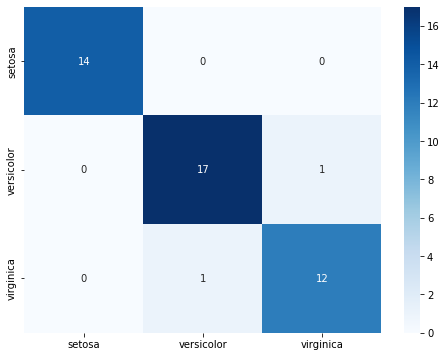

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [23]:
X           = df.iloc[:, :-1]
y           = df.iloc[:,  -1]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=1)

feature_1   = 2
feature_2   = 3

plt.figure(figsize = (8, 6))

clf_poly    = SVC(kernel = 'poly')
clf_poly.fit(Xtrain.iloc[:, [feature_1, feature_2]], Ytrain)

ypred       = clf_poly.predict(Xtest.iloc[:, [feature_1, feature_2]])

cr          = classification_report(y_pred = ypred, y_true=Ytest)

cnf_matrix  = confusion_matrix(y_true=Ytest, y_pred=ypred)
cnf_matrix  = confusion_matrix(y_true=Ytest, y_pred=ypred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g',
            xticklabels=class_names , yticklabels=class_names,
            cmap=plt.cm.Blues)
plt.show()
print(cr)

In [24]:
%%capture
a = Xtest.iloc[:, feature_1].min() - 0.5
b = Xtest.iloc[:, feature_1].max() + 0.5

x = np.linspace(a, b, 1000)

c = Xtest.iloc[:, feature_2].min() - 0.5
d = Xtest.iloc[:, feature_2].max() + 0.5

y = np.linspace(c, d, 1000)

xx, yy = np.meshgrid(x, y)

z = np.c_[xx.reshape(-1, 1), yy.reshape(-1, 1)]

zz = clf_poly.predict(z).reshape(xx.shape)

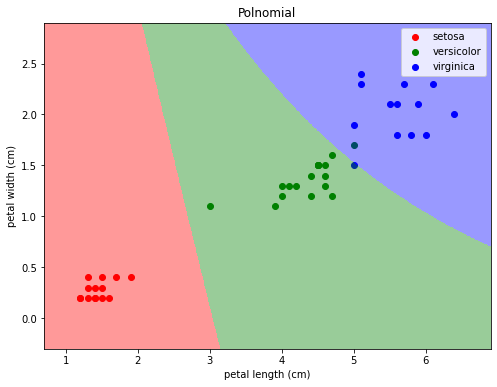

In [25]:
plt.figure(figsize = (8, 6))

for i, c in zip(sorted(Ytest.unique()), list('rgb')):
    plt.scatter(x = Xtest.loc[Ytest == i].iloc[:, feature_1], y = Xtest.loc[Ytest == i].iloc[:, feature_2], c = c, label = iris.target_names[i])

plt.pcolormesh(xx, yy, zz, cmap = ListedColormap(list('rgb')), alpha=0.4)
plt.xlabel(feature_name[feature_1])
plt.ylabel(feature_name[feature_2])
plt.legend([iris.target_names[0], iris.target_names[1], iris.target_names[2]])
plt.title('Polnomial')
plt.show()

<center><font color="#00FF00"><h1>Part D</h2></font></center>

<font color="#FFFF00"><span class = "latex"><h3>$$\gamma$$</h3></span></font>

In [27]:
iris = load_iris()
X    = iris.data[:, :2]
y    = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<font color="#FFFF00"><span class = "latex"><h4>$$\gamma = 5$$</h4></span></font>

In [28]:
# Instantiate SVC with linear kernel
svc = SVC(kernel='linear', C=1.0, gamma=5)

# Fit the model to the training data
svc.fit(X_train, y_train)

# Predict the test set labels
y_pred = svc.predict(X_test)

In [29]:
%%capture
a = X[:, 0].min() - 0.5
b = X[:, 0].max() + 0.5

e = np.linspace(a, b, 1000)

c = X[:, 1].min() - 0.5
d = X[:, 1].max() + 0.5

f = np.linspace(c, d, 1000)

xx, yy = np.meshgrid(e, f)

z = np.c_[xx.reshape(-1, 1), yy.reshape(-1, 1)]

zz = clf_poly.predict(z).reshape(xx.shape)

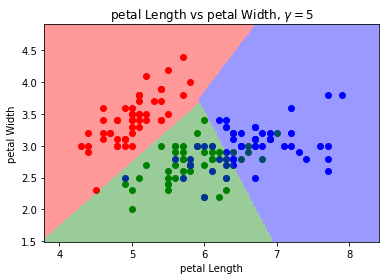

In [30]:
# Plot the decision boundary
plt.figure()
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# # Plot the data points

for i, c in zip(sorted(Ytest.unique()), list('rgb')):
    plt.scatter(x = X[y == i, 0], y = X[y == i, 1], c = c)

plt.pcolormesh(xx, yy, Z, cmap = ListedColormap(list('rgb')), alpha=0.4)

plt.xlabel('petal Length')
plt.ylabel('petal Width')
plt.title('petal Length vs petal Width, $\gamma = 5$')

# Show the plot
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



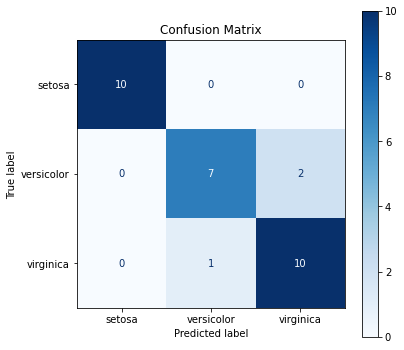

In [31]:

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Compute the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

labels = iris.target_names
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
display.plot(ax=ax, cmap=plt.cm.Blues)

# Set plot labels and title
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()

<font color="#FFFF00"><span class = "latex"><h4>$$\gamma = 50$$</h4></span></font>

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



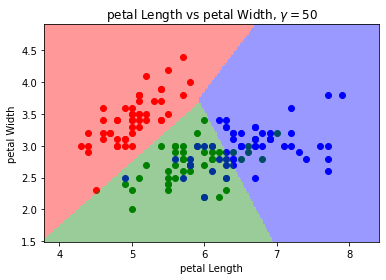

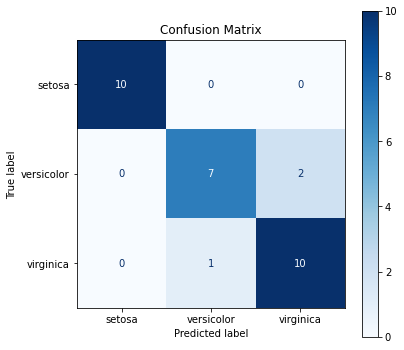

In [32]:
# Instantiate SVC with linear kernel
svc = SVC(kernel='linear', C=1.0, gamma=50)

# Fit the model to the training data
svc.fit(X_train, y_train)

# Predict the test set labels
y_pred = svc.predict(X_test)

# Plot the decision boundary
plt.figure()
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# # Plot the data points

for i, c in zip(sorted(Ytest.unique()), list('rgb')):
    plt.scatter(x = X[y == i, 0], y = X[y == i, 1], c = c)

plt.pcolormesh(xx, yy, Z, cmap = ListedColormap(list('rgb')), alpha=0.4)

plt.xlabel('petal Length')
plt.ylabel('petal Width')
plt.title('petal Length vs petal Width, $\gamma = 50$')

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Compute the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

labels = iris.target_names
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
display.plot(ax=ax, cmap=plt.cm.Blues)

# Set plot labels and title
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()

<font color="#FFFF00"><span class = "latex"><h4>$$\gamma = 500$$</h4></span></font>

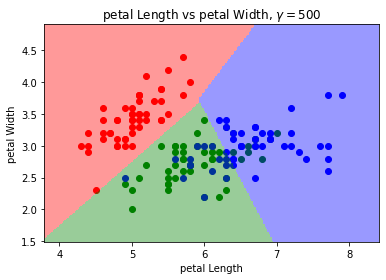

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



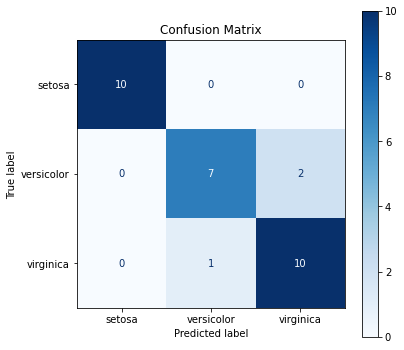

In [33]:
# Instantiate SVC with linear kernel
svc = SVC(kernel='linear', C=1.0, gamma=500)

# Fit the model to the training data
svc.fit(X_train, y_train)

# Predict the test set labels
y_pred = svc.predict(X_test)
# Plot the decision boundary
plt.figure()
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
for i, c in zip(sorted(Ytest.unique()), list('rgb')):
    plt.scatter(x = X[y == i, 0], y = X[y == i, 1], c = c)

plt.pcolormesh(xx, yy, Z, cmap = ListedColormap(list('rgb')), alpha=0.4)

plt.xlabel('petal Length')
plt.ylabel('petal Width')
plt.title('petal Length vs petal Width, $\gamma = 500$')

# Show the plot
plt.show()

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Compute the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

labels = iris.target_names
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
display.plot(ax=ax, cmap=plt.cm.Blues)

# Set plot labels and title
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()

<center><font color="#FFFF00"><h3>Regression</h3></font></center>

<font color="#FFFF00"><span class = "latex"><h4>$$C = 1$$</h4></span></font>

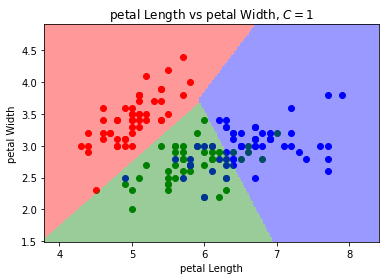

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



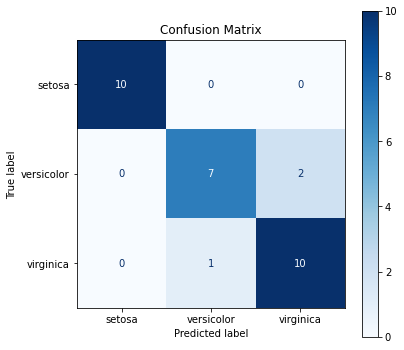

In [34]:
# Instantiate SVC with linear kernel
svc = SVC(kernel='linear', C=1.0)

# Fit the model to the training data
svc.fit(X_train, y_train)

# Predict the test set labels
y_pred = svc.predict(X_test)
# Plot the decision boundary
plt.figure()
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
for i, c in zip(sorted(Ytest.unique()), list('rgb')):
    plt.scatter(x = X[y == i, 0], y = X[y == i, 1], c = c)

plt.pcolormesh(xx, yy, Z, cmap = ListedColormap(list('rgb')), alpha=0.4)

plt.xlabel('petal Length')
plt.ylabel('petal Width')
plt.title('petal Length vs petal Width, $C = 1$')

# Show the plot
plt.show()

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Compute the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

labels = iris.target_names
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
display.plot(ax=ax, cmap=plt.cm.Blues)

# Set plot labels and title
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()

<font color="#FFFF00"><span class = "latex"><h4>$$C = 10$$</h4></span></font>

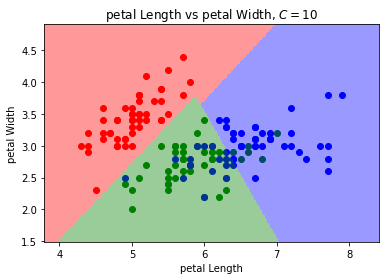

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



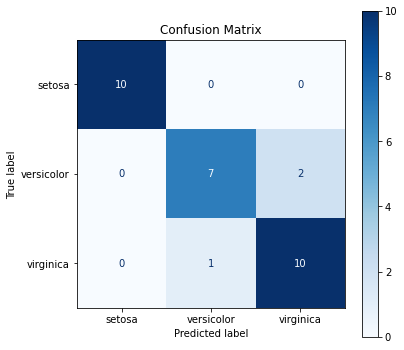

In [35]:
# Instantiate SVC with linear kernel
svc = SVC(kernel='linear', C=10.0, gamma=50)

# Fit the model to the training data
svc.fit(X_train, y_train)

# Predict the test set labels
y_pred = svc.predict(X_test)
# Plot the decision boundary
plt.figure()
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# # Plot the data points
for i, c in zip(sorted(Ytest.unique()), list('rgb')):
    plt.scatter(x = X[y == i, 0], y = X[y == i, 1], c = c)

plt.pcolormesh(xx, yy, Z, cmap = ListedColormap(list('rgb')), alpha=0.4)

plt.xlabel('petal Length')
plt.ylabel('petal Width')
plt.title('petal Length vs petal Width, $C = 10$')

# Show the plot
plt.show()

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Compute the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

labels = iris.target_names
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
display.plot(ax=ax, cmap=plt.cm.Blues)

# Set plot labels and title
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()

<font color="#FFFF00"><span class = "latex"><h4>$$C = 100$$</h4></span></font>

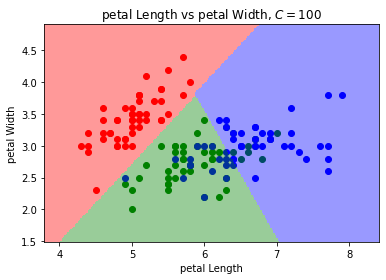

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



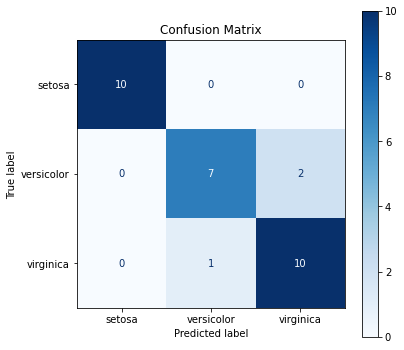

In [36]:
# Instantiate SVC with linear kernel
svc = SVC(kernel='linear', C=100.0, gamma=50)

# Fit the model to the training data
svc.fit(X_train, y_train)

# Predict the test set labels
y_pred = svc.predict(X_test)
# Plot the decision boundary
plt.figure()
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# # Plot the data points
for i, c in zip(sorted(Ytest.unique()), list('rgb')):
    plt.scatter(x = X[y == i, 0], y = X[y == i, 1], c = c)

plt.pcolormesh(xx, yy, Z, cmap = ListedColormap(list('rgb')), alpha=0.4)

plt.xlabel('petal Length')
plt.ylabel('petal Width')
plt.title('petal Length vs petal Width, $C = 100$')

# Show the plot
plt.show()

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Compute the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

labels = iris.target_names
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
display.plot(ax=ax, cmap=plt.cm.Blues)

# Set plot labels and title
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()

<center><font color="#0FF000"><h1>Part E</h2></font></center>

In [37]:
param_grid_linear = { 'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}
param_grid_poly   = { 'C': [0.1, 1, 10]     , 'gamma': [0.1, 1], 'degree': [2, 3, 4]}

svm_rbf_model           = SVC(kernel = 'rbf')
svm_linear_model        = SVC(kernel = 'linear')
svm_polynomial_model    = SVC(kernel = 'poly')

# Perform grid search using cross-validation
grid_search_linear = GridSearchCV(estimator = svm_linear_model    , param_grid = param_grid_linear, cv = 5)
grid_search_rbf    = GridSearchCV(estimator = svm_rbf_model       , param_grid = param_grid_linear, cv = 5)
grid_search_poly   = GridSearchCV(estimator = svm_polynomial_model, param_grid = param_grid_poly  , cv = 5)

grid_search_linear.fit(Xtrain, Ytrain)
best_params_linear = grid_search_linear.best_params_
best_model_linear  = grid_search_linear.best_estimator_

grid_search_rbf.fit(Xtrain, Ytrain)
best_params_rbf   = grid_search_rbf.best_params_
best_model_rbf    = grid_search_rbf.best_estimator_

grid_search_poly.fit(Xtrain, Ytrain)
best_params_poly  = grid_search_poly.best_params_
best_model_poly   = grid_search_poly.best_estimator_

<center><font color="#FFFF00"><h3>Linear</h3></font></center>

In [38]:
X = df.iloc[:, :-1]
y = df.iloc[:,  -1]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=1)

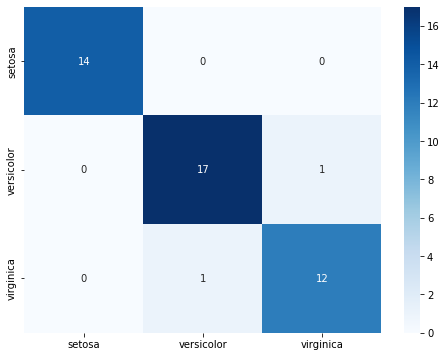

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [39]:
feature_1 = 2
feature_2 = 3

plt.figure(figsize = (8, 6))

clf_linear  = best_model_linear
clf_linear.fit(Xtrain.iloc[:, [feature_1, feature_2]], Ytrain)

ypred       = clf_linear.predict(Xtest.iloc[:, [feature_1, feature_2]])

cr          = classification_report(y_pred = ypred, y_true=Ytest)

cnf_matrix  = confusion_matrix(y_true=Ytest, y_pred=ypred)
cnf_matrix  = confusion_matrix(y_true=Ytest, y_pred=ypred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g',
            xticklabels=class_names , yticklabels=class_names,
            cmap=plt.cm.Blues)
plt.show()
print(cr)

In [40]:
%%capture
a = Xtest.iloc[:, feature_1].min() - 0.5
b = Xtest.iloc[:, feature_1].max() + 0.5

x = np.linspace(a, b, 1000)

c = Xtest.iloc[:, feature_2].min() - 0.5
d = Xtest.iloc[:, feature_2].max() + 0.5

y = np.linspace(c, d, 1000)

xx, yy = np.meshgrid(x, y)

z = np.c_[xx.reshape(-1, 1), yy.reshape(-1, 1)]

zz = clf_linear.predict(z).reshape(xx.shape)

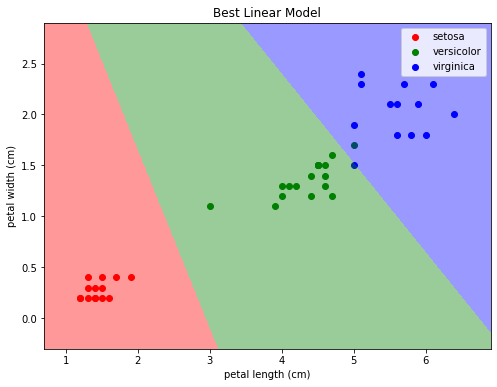

In [41]:
plt.figure(figsize = (8, 6))

for i, c in zip(sorted(Ytest.unique()), list('rgb')):
    plt.scatter(x = Xtest.loc[Ytest == i].iloc[:, feature_1], y = Xtest.loc[Ytest == i].iloc[:, feature_2], c = c, label = iris.target_names[i])

plt.pcolormesh(xx, yy, zz, cmap = ListedColormap(list('rgb')), alpha=0.4)
plt.xlabel(feature_name[feature_1])
plt.ylabel(feature_name[feature_2])
plt.legend([iris.target_names[0], iris.target_names[1], iris.target_names[2]])
plt.title('Best Linear Model')
plt.show()

<center><font color="#FFFF00"><h3>RBF (Radial Basis Function)</h3></font></center>

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



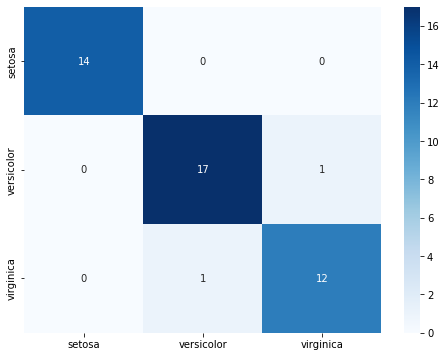

In [42]:
X           = df.iloc[:, :-1]
y           = df.iloc[:,  -1]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=1)

feature_1   = 2
feature_2   = 3

plt.figure(figsize = (8, 6))

clf_rbf     = best_model_rbf
clf_rbf.fit(Xtrain.iloc[:, [feature_1, feature_2]], Ytrain)

ypred       = clf_rbf.predict(Xtest.iloc[:, [feature_1, feature_2]])
cr          = classification_report(y_pred = ypred, y_true=Ytest)
cnf_matrix  = confusion_matrix(y_true=Ytest, y_pred=ypred)
cnf_matrix  = confusion_matrix(y_true=Ytest, y_pred=ypred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g',
            xticklabels=class_names , yticklabels=class_names,
            cmap=plt.cm.Blues)
print(cr)
plt.show()

In [43]:
%%capture
a = Xtest.iloc[:, feature_1].min() - 0.5
b = Xtest.iloc[:, feature_1].max() + 0.5

x = np.linspace(a, b, 1000)

c = Xtest.iloc[:, feature_2].min() - 0.5
d = Xtest.iloc[:, feature_2].max() + 0.5

y = np.linspace(c, d, 1000)

xx, yy = np.meshgrid(x, y)

z = np.c_[xx.reshape(-1, 1), yy.reshape(-1, 1)]

zz = clf_rbf.predict(z).reshape(xx.shape)

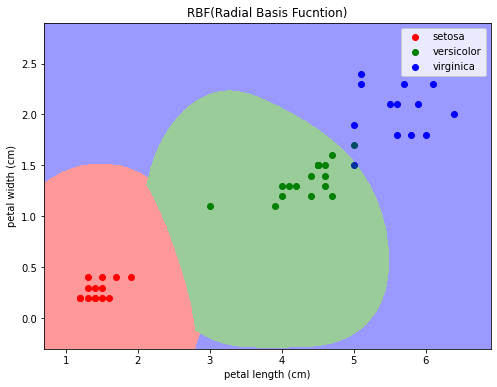

In [44]:
plt.figure(figsize = (8, 6))

for i, c in zip(sorted(Ytest.unique()), list('rgb')):
    plt.scatter(x = Xtest.loc[Ytest == i].iloc[:, feature_1], y = Xtest.loc[Ytest == i].iloc[:, feature_2], c = c, label = iris.target_names[i])

plt.pcolormesh(xx, yy, zz, cmap = ListedColormap(list('rgb')), alpha=0.4)
plt.xlabel(feature_name[feature_1])
plt.ylabel(feature_name[feature_2])
plt.legend([iris.target_names[0], iris.target_names[1], iris.target_names[2]])
plt.title('RBF(Radial Basis Fucntion)')
plt.show()

<center><font color="#FFFF00"><h3>Polynomial</h3></font></center>

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



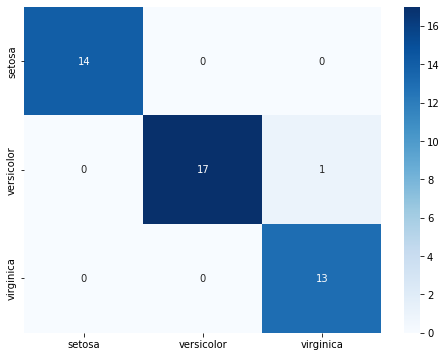

In [45]:
X           = df.iloc[:, :-1]
y           = df.iloc[:,  -1]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=1)

feature_1   = 2
feature_2   = 3

plt.figure(figsize = (8, 6))

clf_poly    = best_model_poly
clf_poly.fit(Xtrain.iloc[:, [feature_1, feature_2]], Ytrain)

ypred       = clf_poly.predict(Xtest.iloc[:, [feature_1, feature_2]])

cr          = classification_report(y_pred = ypred, y_true=Ytest)

print(cr)
cnf_matrix  = confusion_matrix(y_true=Ytest, y_pred=ypred)
cnf_matrix  = confusion_matrix(y_true=Ytest, y_pred=ypred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g',
            xticklabels=class_names , yticklabels=class_names,
            cmap=plt.cm.Blues)
plt.show()

In [46]:
%%capture
a = Xtest.iloc[:, feature_1].min() - 0.5
b = Xtest.iloc[:, feature_1].max() + 0.5

x = np.linspace(a, b, 1000)

c = Xtest.iloc[:, feature_2].min() - 0.5
d = Xtest.iloc[:, feature_2].max() + 0.5

y = np.linspace(c, d, 1000)

xx, yy = np.meshgrid(x, y)

z = np.c_[xx.reshape(-1, 1), yy.reshape(-1, 1)]

zz = clf_poly.predict(z).reshape(xx.shape)

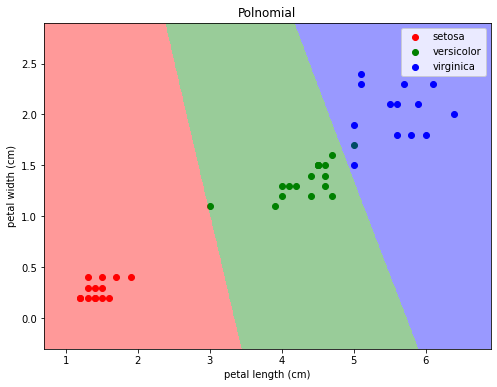

In [47]:
plt.figure(figsize = (8, 6))

for i, c in zip(sorted(Ytest.unique()), list('rgb')):
    plt.scatter(x = Xtest.loc[Ytest == i].iloc[:, feature_1], y = Xtest.loc[Ytest == i].iloc[:, feature_2], c = c, label = iris.target_names[i])

plt.pcolormesh(xx, yy, zz, cmap = ListedColormap(list('rgb')), alpha=0.4)
plt.xlabel(feature_name[feature_1])
plt.ylabel(feature_name[feature_2])
plt.legend([iris.target_names[0], iris.target_names[1], iris.target_names[2]])
plt.title('Polnomial')
plt.show()

<center><font color="#0FF000"><h1>Part F</h2></font></center>

In [50]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [51]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


*****results for SVC with linear kernel one vs rest *****
Test accuracy of svm with SVC with linear kernel one vs rest :1.0
Train accuracy of svm with SVC with linear kernel one vs rest :0.9809523809523809

              precision    recall  f1-score   support

  Versicolor       1.00      1.00      1.00        14
   Verginica       1.00      1.00      1.00        18
      Setosa       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

*****results for SVC with linear kernel one vs one  *****
Test accuracy of svm with SVC with linear kernel one vs one  :1.0
Train accuracy of svm with SVC with linear kernel one vs one  :0.9809523809523809

              precision    recall  f1-score   support

  Versicolor       1.00      1.00      1.00        14
   Verginica       1.00      1.00      1.00        18
      Setosa       1.00      1.00      1.0

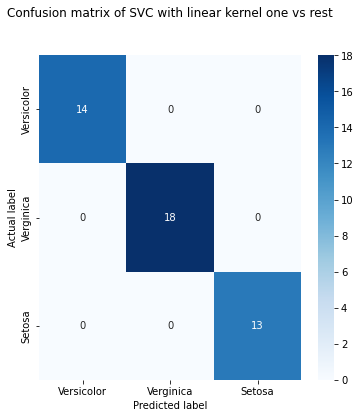

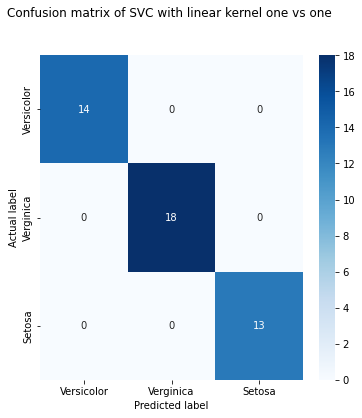

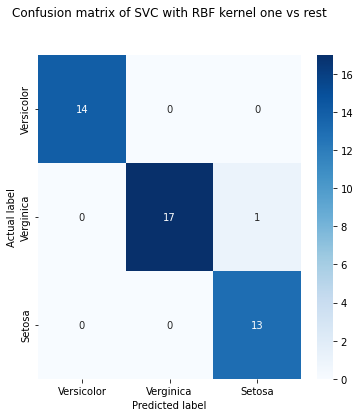

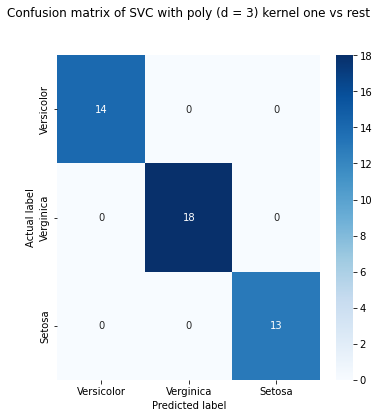

In [52]:
class_weight='balanced'

X           = df.iloc[:, :-1]
y           = df.iloc[:,  -1]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=1)

#Defining models :
models = (SVC(kernel='linear',class_weight=class_weight,           decision_function_shape='ovr'),
          SVC(kernel='linear',class_weight=class_weight,           decision_function_shape='ovr'),
          SVC(kernel='rbf'   ,class_weight=class_weight,           decision_function_shape='ovr'),
          SVC(kernel='poly'  ,class_weight=class_weight, degree=3, decision_function_shape='ovr'))
#fitting
models = (clf.fit(Xtrain, Ytrain) for clf in models)

# title for the plots
titles = ['SVC with linear kernel one vs rest',
          'SVC with linear kernel one vs one ',
          'SVC with RBF kernel one vs rest',
          'SVC with poly (d = 3) kernel one vs rest']

class_names=["Versicolor", "Verginica", "Setosa"] # name  of classes

X0, X1 = Xtrain.iloc[:, 0], Xtrain.iloc[:, 1]
xx, yy = make_meshgrid(X0, X1)

test_scores = []
train_scores = []
for clf, title in zip(models, titles):

    print("*****results for "+ str(title)+" *****")
    ##calculating the test and train scores
    test_scores.append(clf.score(Xtest,Ytest))
    train_scores.append(clf.score(Xtrain,Ytrain))
    ## Reporting the test and train scores
    print('Test accuracy of svm with '+ str(title)+ ' :'+str(test_scores[titles.index(title)]))
    print('Train accuracy of svm with '+ str(title)+ ' :'+str(train_scores[titles.index(title)])+"\n")
    y_pred  = clf.predict(Xtest)
    print(classification_report(Ytest.values, y_pred, target_names=class_names))

    plt.figure(figsize = (10, 6))

    #plotting the Confusion Matrix
    cnf_matrix = confusion_matrix(list(Ytest.values), list(y_pred))
    plt.subplot(1, 2, 2)
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g',
                xticklabels=class_names , yticklabels=class_names,
                cmap=plt.cm.Blues)
    plt.tight_layout()
    plt.title('Confusion matrix of '+title, y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.plot()